# Chapter 6 Learning to Classify Text

Now that we have the necessary skill to begin to process text, we can start to answer the following questions:

- How can we identify particular features of language data that are salient for classifying it?
- How can we construct models of language that can be used to perform language processing tasks automatically?
- What can we learn about language from these models?

# Section 7 Modeling Linguistic Patterns

- Classifiers allow us to create **models** of the patterns that occur in natural language. 
- These models can then be used to make predictions about new data.
- Those predictions can be used to determine the accuracy of the model. 
- Once accurate, the model can then be deployed automatically.

## 7.1 What do models tell us?

- Descriptive models: describe the data, but don't tell you **why**
- Explanatory models: explain the why by postulating causal relationships

In [1]:
import nltk

# 1 Supervised Classification

**Classification** - giving something a label
- For example, deciding if an email is spam
- Categorizing topics like adding keywords
- Disambiguating word sense 

**Supervised** classifiers are:

- Built on a training corpus 
- Assessed for quality
- Then used for prediction

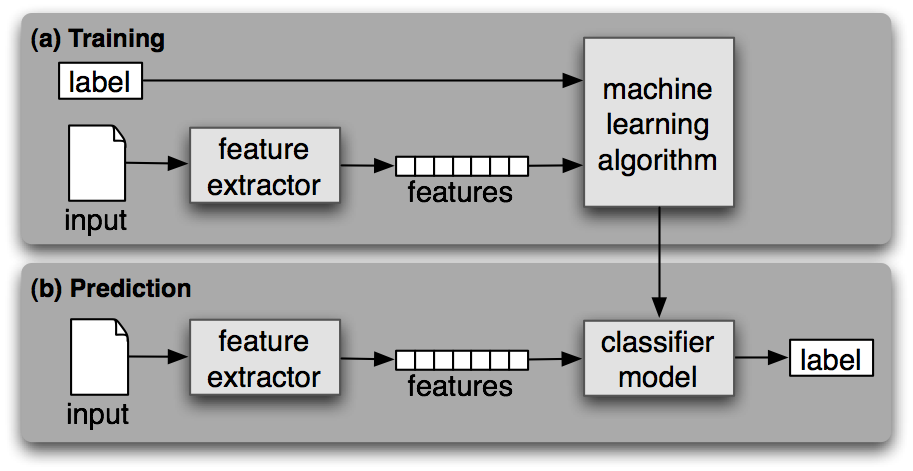

In [2]:
from IPython.display import Image
Image("lesson6-supervised.png")

# 1.1 Gender Identification

Let's try an example - we've already seen that men and women's names end/start with different letters (probabilistically). 

- The first step to a classifier is to decide what **features** are relevant.
- Next, you have to decide how to **encode** those features.

In [3]:
##define a function of what features to use
def gender_features(word):
    #return only the last letter
    return {"last_letter": word[-1]} 

gender_features("Erin")
#notice the output is a dictionary

{'last_letter': 'n'}

When you create a dictionary of the encoded features, it's called a **feature set**. 

Generally feature values are encoded in simple types such as booleans (T/F), numbers, and strings.

Next step: use a training dataset!

In [4]:
##import a labeled corpus
from nltk.corpus import names
##create a list of tuples indicating male and female
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
##shuffle the dataset
import random
random.shuffle(labeled_names)

In [5]:
##use our feature extractor we created earlier 
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
len(featuresets)

7944

In [6]:
##create separate training and testing sets
##notice here that we split these evenly
##also notice how you can set two variables on the left and right
train_set, test_set = featuresets[500:], featuresets[:500]

##train the classifier - a Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [7]:
##does it work?
print("Erin is a " + classifier.classify(gender_features("Erin")))

print("Josh is a " + classifier.classify(gender_features("Josh")))

Erin is a male
Josh is a female


In [8]:
##how accurate is it really?
##notice this is .accuracy versus the pos taggers, which is .evaluate 
##format is nltk.classify.accuracy(YOUR TRAINED CLASSIFIER, TEST DATA)
print(nltk.classify.accuracy(classifier, test_set))

0.752


In [9]:
##what was the best way to classify?
##yourtrainedclassifier.show_most_informative_features(# to show)
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     35.4 : 1.0
             last_letter = 'k'              male : female =     32.3 : 1.0
             last_letter = 'f'              male : female =     15.3 : 1.0
             last_letter = 'p'              male : female =     11.2 : 1.0
             last_letter = 'd'              male : female =     10.2 : 1.0
             last_letter = 'v'              male : female =      9.8 : 1.0
             last_letter = 'm'              male : female =      9.2 : 1.0
             last_letter = 'o'              male : female =      8.3 : 1.0
             last_letter = 'r'              male : female =      6.9 : 1.0
             last_letter = 'g'              male : female =      5.1 : 1.0


The numbers presented are **likelihood ratios**, which give you the odds of each category.

Creating a list like we did to store the feature sets can take up a lot of time and memory, so you can also use:

In [10]:
from nltk.classify import apply_features

##apply_features takes the function argument first, and then the test/train data
##basically works the same way we did earlier, but saves memory
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

# 1.2 Choosing The Right Features

- The features have the largest impact on what you get from your model.
- Generally, this process is a lot of trial and error, with some educated guesses on what might be important.
- Sometimes people take the "kitchen sink" approach - but be careful of **overfitting**. 
    - If you have too many features, you can fit the training data well, but then it doesn't generalize to other datasets. 

### How do you know what's working?

- **Error analysis**: refining a feature set by examining multiple test sets
- Create a *development set*, which is split into training and test sets.
    - Use this set to test and train features until you are satisfied.
- Test against a final test set. 


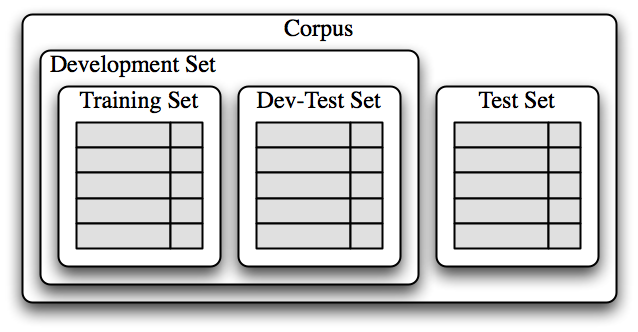

In [11]:
Image("lesson6-error.png")

In [12]:
##Error training example
##error training datasets
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

In [13]:
##apply the features to the dataset
train_set = apply_features(gender_features, train_names)
devtest_set = apply_features(gender_features, devtest_names)
test_set = apply_features(gender_features, test_names)

In [14]:
##train the classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.751


In [15]:
##the point of a dev set is to see the mistakes

##create a empty list of errors
errors = []

##loop over the names in the dev test
for (name, tag) in devtest_names:
    ##guess at the classification
    guess = classifier.classify(gender_features(name))
    ##if wrong, put it in the errors list
    if guess != tag:
        errors.append( (tag, guess, name) )

In [16]:
##print it out by looping and making it nice looking:
for (tag, guess, name) in sorted(errors):
    print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Abigael                       
correct=female   guess=male     name=Adelind                       
correct=female   guess=male     name=Adriaens                      
correct=female   guess=male     name=Aleen                         
correct=female   guess=male     name=Ardys                         
correct=female   guess=male     name=Avrit                         
correct=female   guess=male     name=Bab                           
correct=female   guess=male     name=Beau                          
correct=female   guess=male     name=Berget                        
correct=female   guess=male     name=Brit                          
correct=female   guess=male     name=Cameo                         
correct=female   guess=male     name=Carlen                        
correct=female   guess=male     name=Caro                          
correct=female   guess=male     name=Carol-Jean                    
correct=female   guess=male     name=Carroll    

In [17]:
##from examining the data, appears that last two letters like LL or IN might be useful
def gender_features(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}

In [18]:
##apply the features to the dataset
train_set = apply_features(gender_features, train_names)
devtest_set = apply_features(gender_features, devtest_names)
test_set = apply_features(gender_features, test_names)

In [19]:
##train the classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.775


In [20]:
##once you are satisfied you've done the best you can do
##try on the test_set
print(nltk.classify.accuracy(classifier, test_set))
print("Erin is a " + classifier.classify(gender_features("Erin")))
print("Josh is a " + classifier.classify(gender_features("Josh")))

0.764
Erin is a male
Josh is a male


Now that we've done a complete example of a classifier, let's talk terminology:

- Decision Trees
- Naive Bayes Classifiers
- Maximum Entropy Classifiers

Understanding how these models work can help you understand which features to select and how to encode them. 

## 4 Decision Trees

- A simple flow chart that depicts decisions
- A **decision node** is a choice to check feature values and assign them to **leaf nodes**
- **Root node** is the top most part of the tree

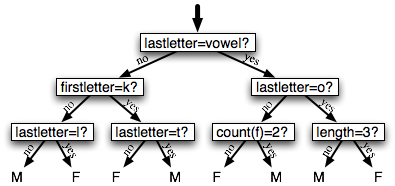

In [21]:
Image("lesson6-decisiontree.png")

Once we have these classified, it's easy to work through how to assign categories.
- However, how do you train such a thing? 
    - **Decision stump** - a decision tree with only one choice (what we've already done!)
    - Examine different decision stumps and pick the one with the best classification
    - Split the data on that value and do the same thing again until a tree is grown 

## 4.1 Entropy and Information Gain

- **Information gain** measure how much more organized the input values are when we divide them up on a given feature. 
- How do you tell what is organized versus not?
    - **Entropy** is a measure of randomness - low values indicate low randomness (good classification) while high values indicate high randomness (bad classification).
    - Once you have the entropy of the original sample, you can then determine if it became better with your classification system. 

In [22]:
##sum of probability of each label times the log probability of the label 
import math
def entropy(labels):
    freqdist = nltk.FreqDist(labels)
    probs = [freqdist.freq(l) for l in freqdist]
    return -sum(p * math.log(p,2) for p in probs)

In [23]:
print(entropy(['male', 'male', 'male', 'male'])) 
print(entropy(['female', 'male', 'female', 'male']))

-0.0
1.0


Decision trees:

- Pros: useful for hierarchical decisions, helps find very useful features, simple to understand
- Cons: since the data is split at each node, training data can become small
    - Can stop once you reach a certain sample size on the training data
    - Can prune a node that doesn't perform well
- Cons: decisions must be checked in a specific order (which is a problem if they are independent)


## 5 Naive Bayes Classifiers

- To overcome the problems with decision trees, we can use a naive Bayes classifier
- All features operate in parallel with input into the final classification
- First, for each object, we use the **prior probability** to determine where it should be classified
    - Easy enough - just calculate the likelihood of that object in the training set
- Then, look at the contribution of the features, and add those probabilities to the prior
- The label with the highest likelihood is where it gets classified

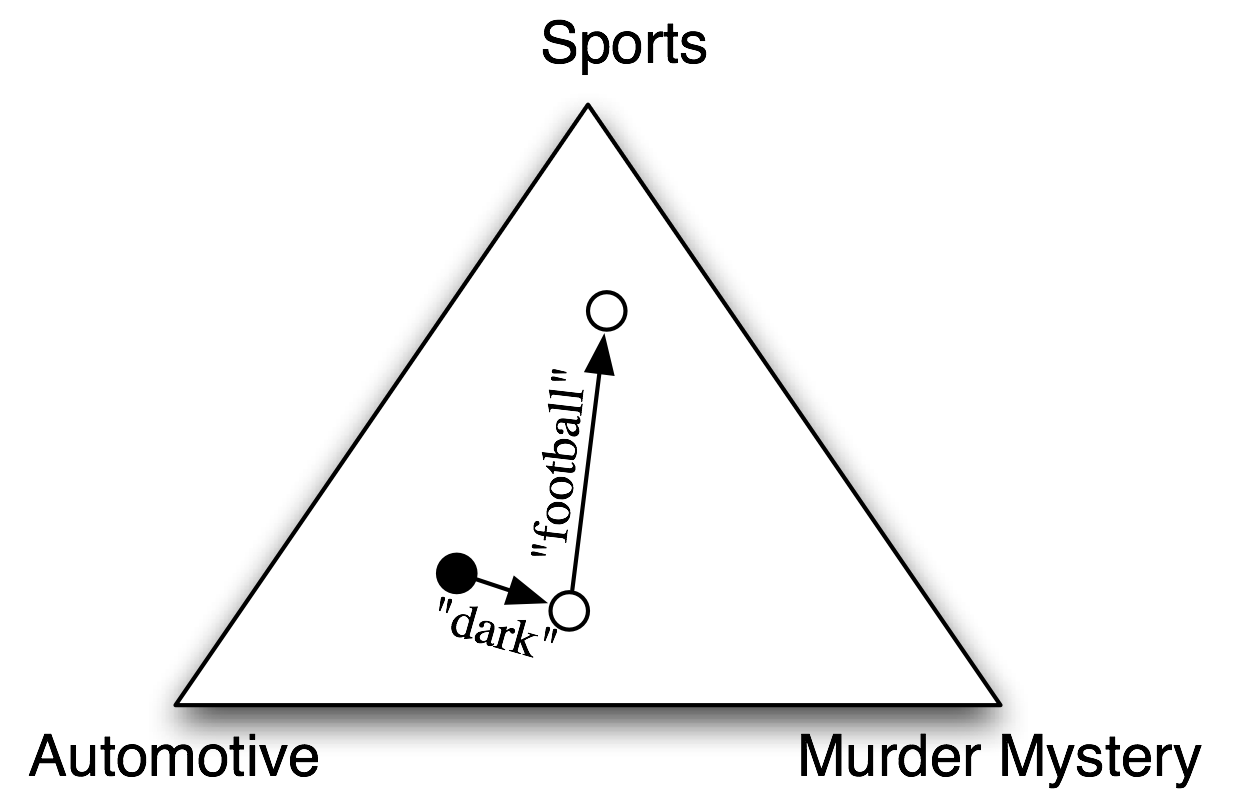

In [24]:
Image("lesson6-bayes.png")

Each feature makes a contribution by voting for or against labels that occur with that feature. 

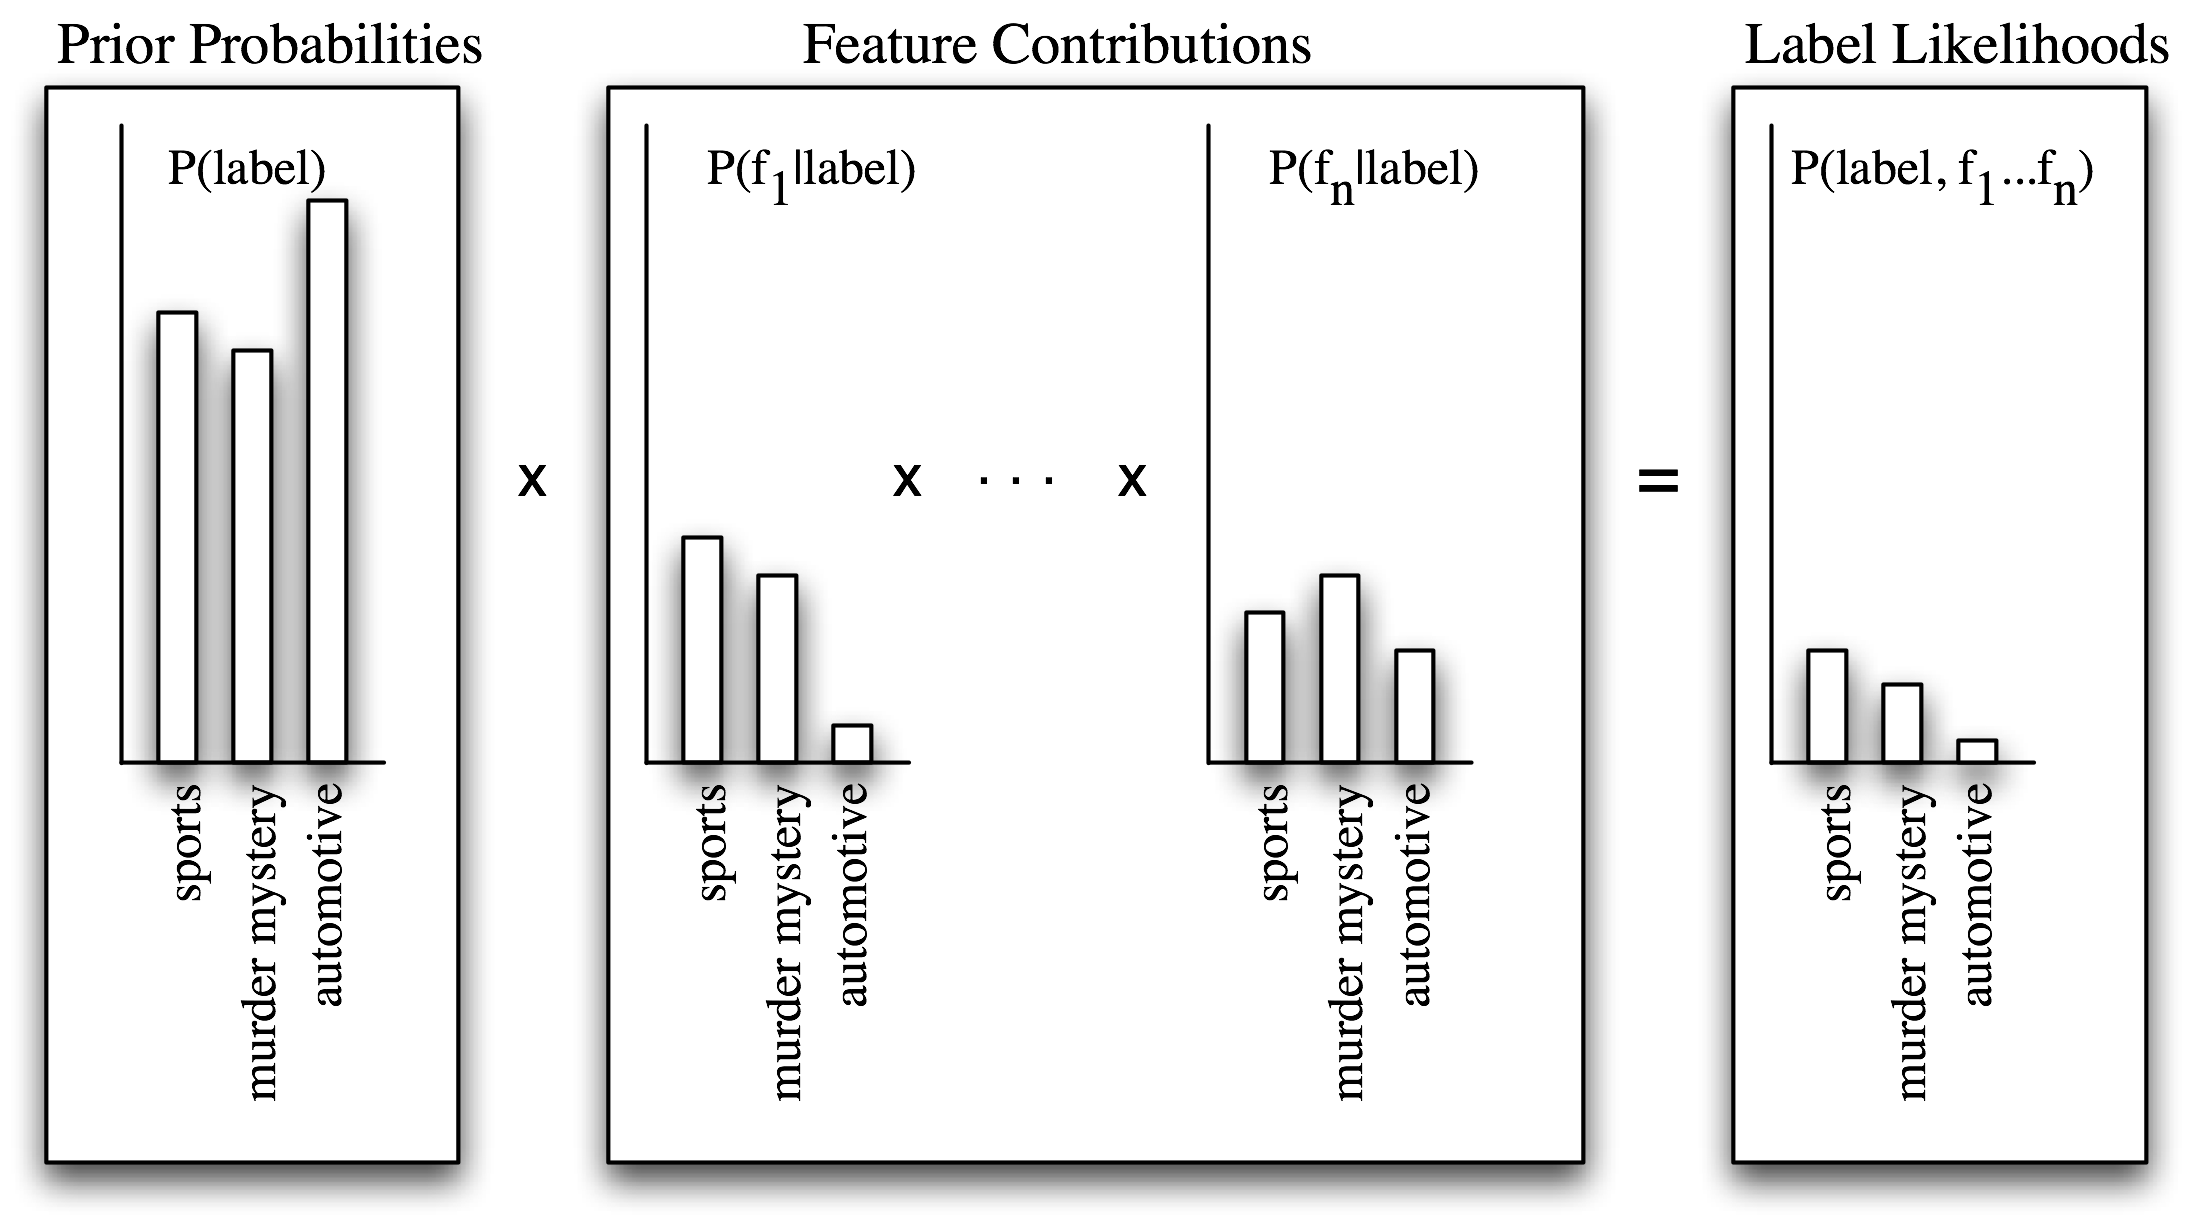

In [25]:
Image("lesson6-bayes2.png")

## 5.1 Underlying Probabilistic Model

- Assumes an **independence** between features: however, this is unrealistic as features are often co-dependent.
- However, by assuming naive Bayes, we can easily combine the contributions of features.
    - P(label|features) = P(features, label)/P(features)
    - The probability of that label, given the features is equal the probability of the combination of that labels and features divided by the probability of the features.

## 5.2 Zero Counts and Smoothing

- One issue is when a feature never occurs with a given label, which cancels it out from being used
- Just because it's not in the training set, doesn't mean it never happens...
- **Smoothing** helps deal with these problems, depends on the type you pick

## 5.3 Non-Binary Features

- What do you do if the feature is not categorical?
- **Binning** - create bins on the continuous data - something like between 4 and 6 letters, etc.

## 6 Maximum Entropy Classifiers

- Similar to a Bayes classifier, and uses Bayes theorem
- Looks at the set of parameters and finds a way to maximize the likelihood of the training corpus
- Uses an **iterative optimization** to refine the solution

- In contrast to Bayes, the user decides the combinations that may occur (much like interactions in analyses).
- These **joint-features** are then calculated with Bayes.
    - This is similar in idea to chi-square analysis - if you don't know anything about your features, you might consider that they have equal probability, however, if you know certain rows and columns are more likely, then you might create a distribution that weights those more heavily.

## 6.3 Generative vs Conditional Classifiers

Naive Bayes is a **generative** classifier: P(input, label) (all 6 questions)

Maximum Entropy is a **conditional** classifier: P(label | input) (only first two)

- What is the most likely label for a given input?
- How likely is a given label for a given input?
- What is the most likely input value?
- How likely is a given input value?
- How likely is a given input value with a given label?
- What is the most likely label for an input that might have one of two values (but we don't know which)?

# 1.3 Document Classification

- Previously, we investigated if we could classify different genders by the last letter or two of their name. 
- Now, let's try to classify documents, rather than single words.
- The `movie_reviews` corpus has a set of movie reviews that have been classified as positive or negative. 

In [69]:
##open movie reviews
from nltk.corpus import movie_reviews

#create a list of the documents organized by tuple 
#(document, category) where category is pos or neg
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

#shuffle those documents
random.shuffle(documents)

- Remember that one of the biggest parts of classification is figuring out which feature sets to use. 
- More than likely, the unit of analysis here will be individual words, rather than characters.
    - For example, positive reviews may contain `liked`, `great`, and `excellent`. 
    - Do you see any problems with this type of analysis?
- Let's build our feature extractor, by seeing if a document has a word or not (remember binary yes/no is important).  

In [70]:
#figure out all the words in movie reviews
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
#only use the top 2000 words for time and idiosyncratic terms
word_features = list(all_words)[:2000]

##remember you need to create a function to apply
def document_features(document): 
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [72]:
data_length = len(documents)
#from 0 to 90 percent
train_set = apply_features(document_features, documents[:int(data_length*.9)])
#from 90 percent to 100 percent
test_set = apply_features(document_features, documents[int(data_length*.9):])

print(len(train_set))
print(len(test_set))
#don't forget we could do dev_train, dev_test, test

1800
200


In [73]:
#train your classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

#test the accuracy
nltk.classify.accuracy(classifier, test_set)

0.795

In [74]:
#what was the most useful set of words?
classifier.show_most_informative_features(20)

Most Informative Features
 contains(unimaginative) = True              neg : pos    =      7.8 : 1.0
       contains(martian) = True              neg : pos    =      7.8 : 1.0
        contains(shoddy) = True              neg : pos    =      7.1 : 1.0
        contains(welles) = True              neg : pos    =      7.1 : 1.0
     contains(atrocious) = True              neg : pos    =      6.7 : 1.0
        contains(turkey) = True              neg : pos    =      6.6 : 1.0
        contains(suvari) = True              neg : pos    =      6.4 : 1.0
          contains(mena) = True              neg : pos    =      6.4 : 1.0
        contains(wasted) = True              neg : pos    =      5.9 : 1.0
           contains(ugh) = True              neg : pos    =      5.9 : 1.0
        contains(justin) = True              neg : pos    =      5.9 : 1.0
        contains(canyon) = True              neg : pos    =      5.7 : 1.0
       contains(miscast) = True              neg : pos    =      5.6 : 1.0

In [31]:
#what are some of the errors?
errors = []

##loop over the original documents in the test set
for (document, tag) in documents[int(data_length*.9):]:
    ##guess at the classification
    guess = classifier.classify(document_features(document))
    ##if wrong, put it in the errors list
    if guess != tag:
        errors.append( (tag, guess, document) )

In [32]:
for (tag, guess, document) in sorted(errors):
    print("correct: ", tag, "guess: ", guess, "document: ", document)
#not the most helpful to sort through BUT you could create freq distributions 
#of the most commonly mis-tagged sets to figure out what words are triggering incorrectly

correct:  neg guess:  pos document:  ['"', 'marie', 'couldn', "'", 't', 'talk', ',', '"', 'paulie', ',', 'the', 'parrot', 'star', 'of', 'his', 'own', 'movie', ',', 'tells', 'us', 'about', 'the', 'daughter', 'in', 'his', 'original', 'family', '.', '"', 'dad', 'couldn', "'", 't', 'listen', '.', 'and', 'mom', 'couldn', "'", 't', 'cope', ',', 'so', 'they', 'got', 'rid', 'of', 'me', '.', '"', 'paulie', ',', 'the', 'autobiography', 'of', 'a', 'talking', ',', 'not', 'merely', 'a', 'mimicking', ',', 'parrot', ',', 'has', 'jay', 'mohr', 'in', 'the', 'lead', 'role', 'of', 'the', 'bird', '-', 'the', 'voice', ',', 'not', 'the', 'body', '-', 'and', 'as', 'the', 'minor', 'character', 'of', 'benny', ',', 'a', 'small', '-', 'time', 'crook', 'who', 'uses', 'paulie', 'to', 'pull', 'off', 'small', 'scams', 'like', 'stealing', 'twenties', 'from', 'atms', '.', 'as', 'the', 'parrot', ',', 'mohr', 'is', 'delightful', 'when', 'director', 'john', 'roberts', 'allows', 'him', 'to', 'cut', 'up', '.', 'benny', ','

In [33]:
print(train_set)

[({'contains(plot)': True, 'contains(:)': False, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': True, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': False, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': False, 'contains(into)': False, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': True, 'contains(continues)': False, 'contains(see)': False, 'contains(him)': False, 'contains(in)': True, 'contains(her)': False, 'contains(life)': False, 'contains(has)': True, 'contains(nightmares)': False, 'contains(what)': False, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'c

# 2.2 Identifying Dialogue Act Types

- We have previously discussed sentence tokenizers and part of speech taggers - classification techniques are what we use to built a smart system to figure out part of speech and sentence boundaries.
- A dialogue act is a way to classify utterances into groups, such as question, statement, and emotions
- Here we can also define our features at the word level, as we are looking for specific words or symbols that might help classification (like ? or what).


In [34]:
#take the posts from the chat corpus
posts = nltk.corpus.nps_chat.xml_posts()

#create our feature extractor
#same as the previous movie example
def dialogue_act_features(post):
     features = {}
     for word in nltk.word_tokenize(post):
         features['contains({})'.format(word.lower())] = True
     return features

In [79]:
#get the features, also add the classification tag so you can test
featuresets = [(dialogue_act_features(post.text), post.get('class')) for post in posts]
print(featuresets[:2])

random.shuffle(featuresets)

#another way to do the sizing, than what I did earlier
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

#train the classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

#test it
print(nltk.classify.accuracy(classifier, test_set))

[({'contains(now)': True, 'contains(im)': True, 'contains(left)': True, 'contains(with)': True, 'contains(this)': True, 'contains(gay)': True, 'contains(name)': True}, 'Statement'), ({'contains(:)': True, 'contains(p)': True}, 'Emotion')]
0.65625


In [36]:
classifier.show_most_informative_features(20)

Most Informative Features
             contains(>) = True            Other : System =    529.7 : 1.0
            contains(hi) = True            Greet : System =    453.0 : 1.0
         contains(empty) = True            Other : System =    391.5 : 1.0
           contains(bye) = True              Bye : Statem =    380.0 : 1.0
          contains(part) = True           System : Statem =    314.8 : 1.0
            contains(no) = True           nAnswe : System =    287.7 : 1.0
           contains(brb) = True              Bye : Statem =    273.0 : 1.0
           contains(yes) = True           yAnswe : Emotio =    235.2 : 1.0
           contains(are) = True           whQues : System =    214.8 : 1.0
            contains(na) = True           ynQues : System =    200.3 : 1.0
           contains(lol) = True           Emotio : System =    198.0 : 1.0
             contains(0) = True            Other : Statem =    189.5 : 1.0
            contains(ok) = True           Accept : System =    184.1 : 1.0

# 2.3 Recognizing Textual Entailment

- Textual entailment is the ability to determine if a text answers a hypothesis question
- Like:
    - Erin has purple hair.
    - Does Erin have purple hair?
- Let's look at a dataset from a textual entailment challenge.

Challenge 3, Pair 34 (True)
- T: Parviz Davudi was representing Iran at a meeting of the Shanghai Co-operation Organisation (SCO), the fledgling association that binds Russia, China and four former Soviet republics of central Asia together to fight terrorism.
- H: China is a member of SCO.

Challenge 3, Pair 81 (False)
- T: According to NC Articles of Organization, the members of LLC company are H. Nelson Beavers, III, H. Chester Beavers and Jennie Beavers Stewart.
- H: Jennie Beavers Stewart is a share-holder of Carolina Analytical Laboratory.



- While this seems like it might be quite hard, we can actually do ok with just a simple set of features using a classification task. 
- Basically, we are just going to look for word overlap between the text and hypothesis. 
    - If hypothesis text is all in the text, then likely true.
    - If hypothesis text has text not in the text, then likely false.

# 3 Evaluation

- What are some of the basic considerations for how we evaluate how good we are doing?
    - Test Set
    - Accuracy
    - Precision and Recall
    - Confusion matries

# 3.1 Test Set

- The test set is an evaluation tool to take our classifier and compare to a known dataset
- Important that we keep this separate from the training set, otherwise the model would simply parrot back the input (and not actually learn anything)
- Here's a paradox - you do not want the test set and the training set to be too similar
    - Makes us less confident that we can generalize to other datasets. 



- How much data should there be?
    - Realistically, we want to train on a much larger set, so the "random" responses are larger in number
    - Must consider the number of classifications/labels and the frequency of each of those labels
    - The size of the smallest label category should be > 50
    - Also want diversity when examining related labels 
    - 10% for training seems to be a good number when using large dataset 

# 3.2 Accuracy

- Accuracy is the simplest measure of how well we are doing with our classifiers
- If you only have two labels, chance accuracy would be 50%, so you have to think about when interpreting your accuracy numbers
- Additionally, you have to consider the frequency of the labels themselves - it's very easy to predict a label that occurs 80% of the time, you'll be right 80% of the time if you guess it 100% of the time. 

# 3.3 Precision and Recall

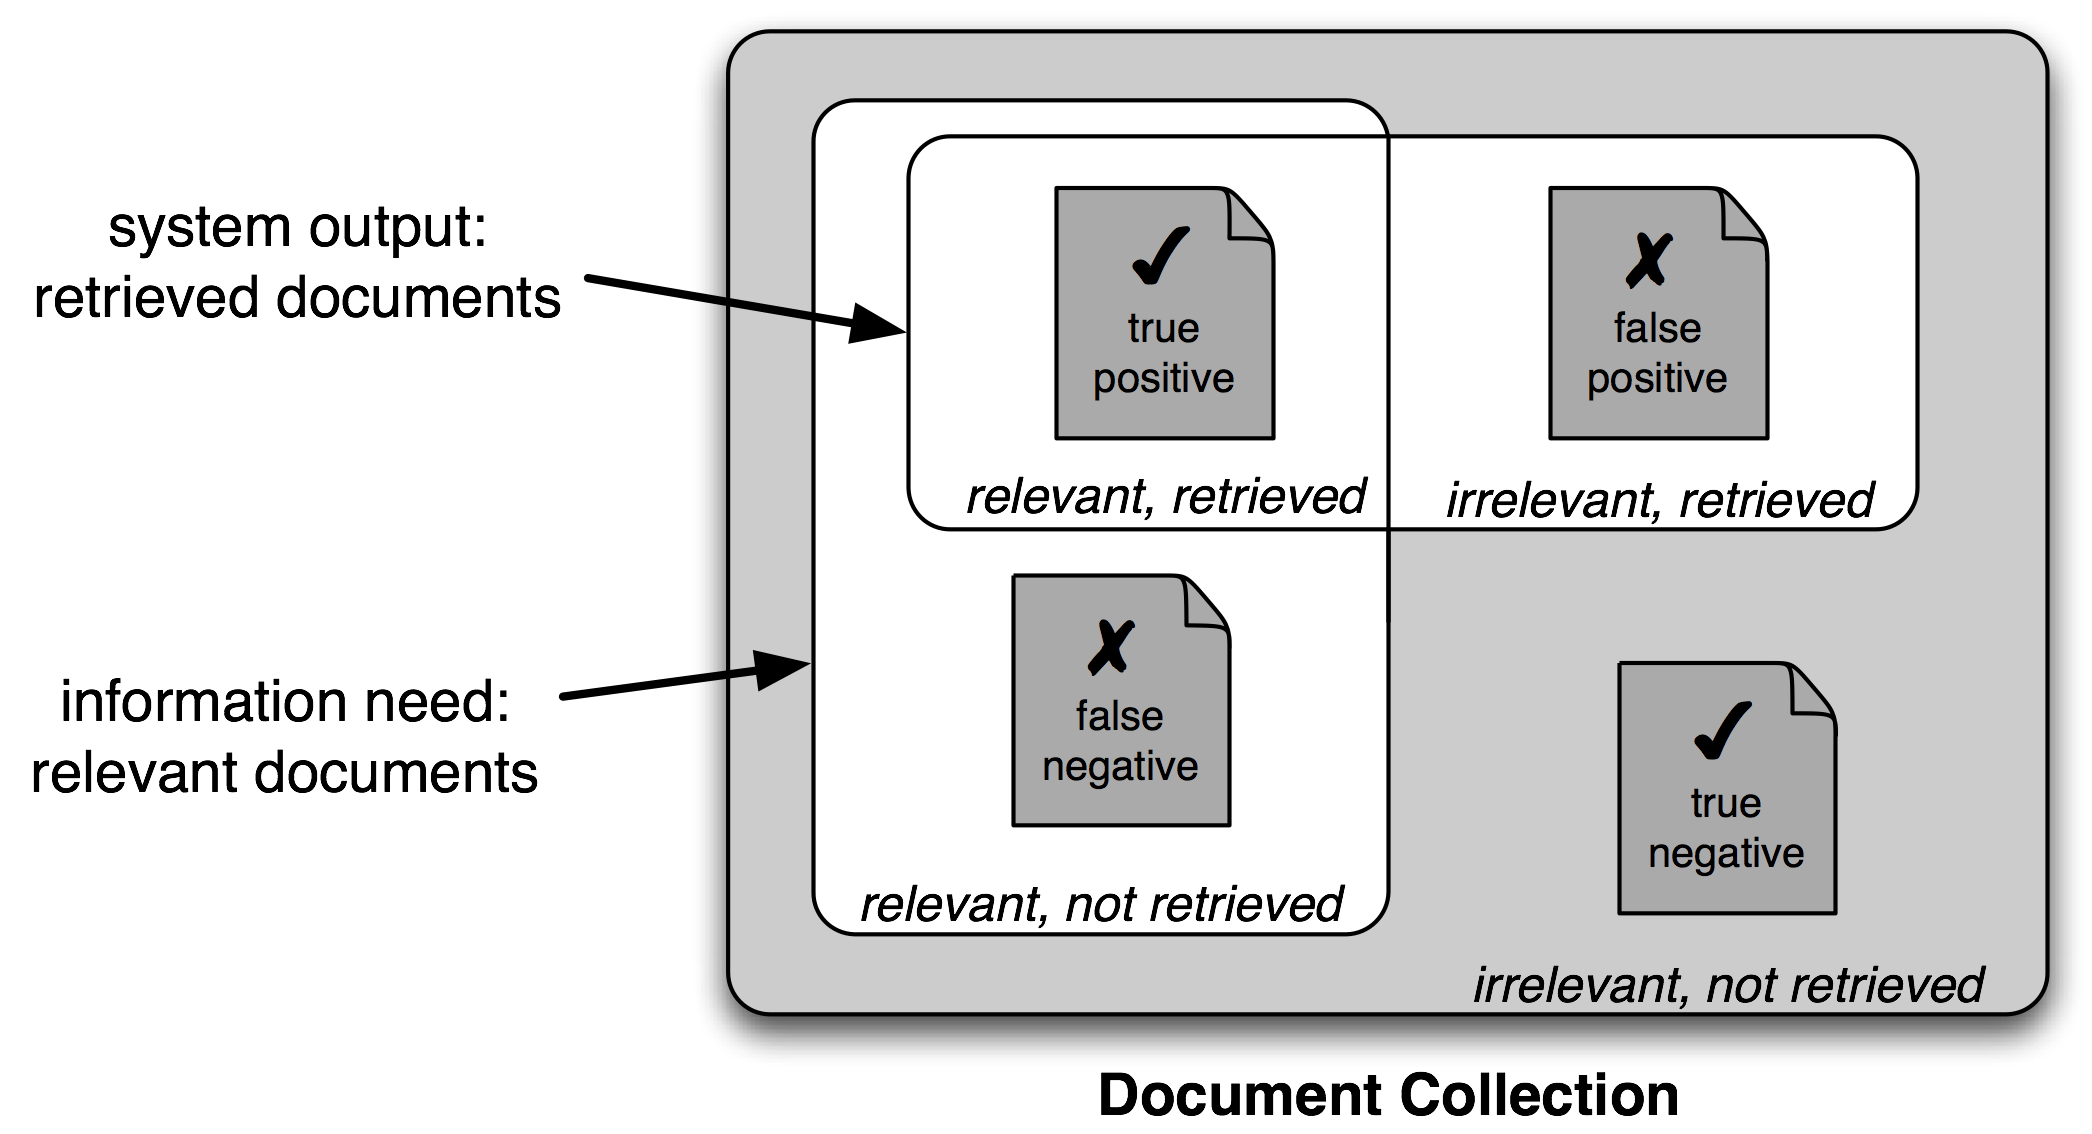

In [37]:
Image("lesson6-precision.png")

Let's say you are trying to find a document on your computer. You will likely find a lot of incorrect documents, so we can classify search results as:

- True positives are relevant items that we correctly identified as relevant. (a hit)
- True negatives are irrelevant items that we correctly identified as irrelevant. (a correct rejection)
- False positives (or Type I errors) are irrelevant items that we incorrectly identified as relevant. (false alarm)
- False negatives (or Type II errors) are relevant items that we incorrectly identified as irrelevant. (miss)

Given these four numbers, we can define the following metrics:

- Precision, which indicates how many of the items that we identified were relevant, is TP/(TP+FP).
- Recall, which indicates how many of the relevant items that we identified, is TP/(TP+FN).
- The F-Measure (or F-Score), which combines the precision and recall to give a single score, is defined to be the harmonic mean of the precision and recall: (2 × Precision × Recall) / (Precision + Recall).

In [84]:
from nltk.metrics.scores import (precision, recall, f_measure)
import collections

#creates a spot for the data to go
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

print(refsets['Emotion'])
print(testsets['Emotion'])

{0, 512, 514, 6, 520, 522, 1036, 526, 1039, 529, 531, 22, 27, 28, 539, 568, 572, 61, 584, 589, 591, 595, 596, 599, 88, 604, 94, 95, 613, 104, 621, 111, 636, 137, 652, 144, 656, 657, 661, 151, 169, 686, 178, 184, 185, 701, 190, 203, 212, 213, 730, 230, 233, 236, 748, 239, 242, 248, 255, 269, 273, 786, 791, 796, 291, 298, 305, 820, 310, 319, 322, 836, 329, 331, 848, 338, 852, 344, 857, 352, 353, 354, 357, 871, 364, 889, 893, 897, 389, 397, 909, 399, 414, 929, 430, 441, 967, 457, 459, 978, 982, 481, 998, 1012, 503, 505, 1022, 511}
{0, 514, 389, 137, 522, 652, 269, 397, 399, 144, 273, 526, 529, 531, 656, 22, 151, 661, 786, 791, 27, 539, 796, 414, 929, 298, 430, 686, 305, 820, 310, 184, 441, 568, 572, 322, 836, 584, 329, 74, 203, 589, 591, 595, 212, 596, 982, 88, 344, 604, 1036, 94, 889, 352, 481, 909, 357, 613, 998, 104, 233, 489, 236, 364, 621, 239, 748, 242, 1012, 503, 248, 505, 893, 1022, 511}


In [87]:
##figure out the different features
print(refsets.keys())
    
##precision on statement only, could loop through these
##answer, then guess
print("Precision: ", precision(refsets['Emotion'], testsets['Emotion']))

##recall on statement
print("Recall: ", recall(refsets['Emotion'], testsets['Emotion']))
    
##f score
print("F Score: ", f_measure(refsets['Emotion'], testsets['Emotion']))

dict_keys(['Emotion', 'Emphasis', 'whQuestion', 'System', 'ynQuestion', 'yAnswer', 'Reject', 'Statement', 'Accept', 'Greet', 'Bye', 'Continuer', 'nAnswer', 'Other'])
Precision:  0.9733333333333334
Recall:  0.6759259259259259
F Score:  0.7978142076502733


# 3.4 Confusion Matrices

- A confusion matrix is a matrix of the right answer to the guessed answer for a classifier.
- These are useful for when you have more than two categories.
- The diagonal of the matrix is the correct answers, while everything off-diagonal is the incorrect answer. 


In [38]:
#get the answers out of the tuples
answer = [tag for (document, tag) in test_set]

print(len(answer))
print(answer)

1056
['Statement', 'Emotion', 'System', 'Greet', 'Statement', 'System', 'Accept', 'System', 'Emotion', 'System', 'Greet', 'Statement', 'System', 'System', 'Statement', 'Reject', 'Reject', 'whQuestion', 'System', 'System', 'Statement', 'System', 'Continuer', 'Statement', 'ynQuestion', 'Statement', 'System', 'Statement', 'System', 'Statement', 'Emotion', 'Statement', 'Emotion', 'Emotion', 'System', 'System', 'Statement', 'Emotion', 'Statement', 'System', 'Emotion', 'Continuer', 'System', 'System', 'Accept', 'ynQuestion', 'System', 'System', 'Statement', 'Statement', 'Accept', 'Statement', 'Emotion', 'ynQuestion', 'Statement', 'Statement', 'Statement', 'Accept', 'Statement', 'ynQuestion', 'Statement', 'System', 'System', 'System', 'Statement', 'Statement', 'System', 'Statement', 'Statement', 'ynQuestion', 'Greet', 'Accept', 'ynQuestion', 'System', 'Greet', 'System', 'System', 'Statement', 'Continuer', 'Accept', 'yAnswer', 'Statement', 'ynQuestion', 'System', 'System', 'Statement', 'System

In [88]:
#get the guesses
guesses = []
for (document, tag) in test_set:
    guess_this = classifier.classify(document)
    guesses.append(guess_this)

print(len(guesses))
print(guesses)

1056
['Emotion', 'Emphasis', 'whQuestion', 'ynQuestion', 'System', 'Statement', 'Statement', 'Clarify', 'yAnswer', 'Reject', 'ynQuestion', 'nAnswer', 'ynQuestion', 'yAnswer', 'System', 'Emphasis', 'Clarify', 'Other', 'Statement', 'Statement', 'System', 'Greet', 'Emotion', 'System', 'System', 'Statement', 'System', 'Emotion', 'Statement', 'System', 'System', 'System', 'Other', 'Statement', 'System', 'System', 'Greet', 'Other', 'Reject', 'Greet', 'Clarify', 'Emphasis', 'System', 'Statement', 'Statement', 'Reject', 'Reject', 'whQuestion', 'ynQuestion', 'System', 'System', 'Statement', 'System', 'System', 'Clarify', 'Other', 'nAnswer', 'System', 'Other', 'Emphasis', 'ynQuestion', 'Emphasis', 'Clarify', 'System', 'Statement', 'Greet', 'System', 'Clarify', 'Statement', 'System', 'yAnswer', 'Statement', 'System', 'Clarify', 'Emotion', 'nAnswer', 'nAnswer', 'Greet', 'Statement', 'Other', 'System', 'Greet', 'Statement', 'Statement', 'Other', 'Other', 'yAnswer', 'Statement', 'Emotion', 'Clarify'

In [40]:
cm = nltk.ConfusionMatrix(answer, guesses)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

           |                                  w      y                      |
           |      S                           h      n                    C |
           |      t                           Q      Q             E      o |
           |      a             E             u      u             m      n |
           |      t      S      m             e      e      A      p      t |
           |      e      y      o      G      s      s      c      h      i |
           |      m      s      t      r      t      t      c      a      n |
           |      e      t      i      e      i      i      e      s      u |
           |      n      e      o      e      o      o      p      i      e |
           |      t      m      n      t      n      n      t      s      r |
-----------+----------------------------------------------------------------+
 Statement | <19.5%>  0.6%   0.1%      .   0.3%   1.1%   0.3%   1.0%   0.4% |
    System |   0.1% <18.6%>     .      .      .      .      .   

# 3.5 Cross-Validation

- Cross-validation is combining many datasets to assure there are lots of tests of the data
- Divide a corpus into "folds" or N datasets
- Train the data all all folds but 1 ... then test the data on that fold 
    - Repeat for all folds
    - Leave one out method
    - Combine the evaluation score
- Test on new datasets!